In [1]:
# --- LOAD COUPLING FILE ---

import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

path = "Couplage_1D_resultats\\"
filename = path+"Lib_Couplage_exok_bio_file_niter1_50_niter2_200.pkl"

with open(filename, 'rb') as f:
    data = pickle.load(f)


# Application
Teq_list     = data["Teq_list"]
press_all    = data["press_all"]
t_list       = data["t_list"]
bio_all      = data["bio_all"]
medium_all   = data["medium_all"]
atmo_all     = data["atmo_all"]
times_all    = data["times_all"]
timesp_all   = data["timesp_all"]
plt.rcParams["figure.figsize"] = (7, 4)
mpl.rcParams['text.usetex'] = False
from cycler import cycler

colors = cycler('color', [plt.cm.inferno(i) for i in np.linspace(0.1, 1, 5)])
plt.rc('axes', axisbelow=True, grid=True, labelcolor='dimgray', labelweight='bold', prop_cycle=colors)
plt.rc('grid', linestyle='solid')
plt.rc('xtick', direction='in', color='dimgray')
plt.rc('ytick', direction='in', color='dimgray')
plt.rc('lines', linewidth=1.5)

In [2]:
# --- DEFINE PLOTS PARAMETERS ---
t_list_years = (np.array(t_list)/365.25)
step = 1
suff = "6_30"

In [3]:
# --- CONCATENATE LISTS TO OBTAIN A CONTINUOUS LIST ---

big_time_list = []
big_timep_list = []
big_ch4_atm_list = []
big_n2_atm_list = []
big_h2_atm_list = []
big_co2_atm_list = []
big_ch4_wat_list = []
big_n2_wat_list = []
big_h2_wat_list = []
big_co2_wat_list = []
big_pressure_list = []
big_NC_list = []
big_X_list = []

for i in range(len(t_list)-1):
    ttim = np.array(times_all[i])+t_list[i]
    ttim2 = np.array(timesp_all[i])+t_list[i]
    big_time_list = np.concatenate([big_time_list,ttim])
    big_timep_list = np.concatenate([big_timep_list,ttim2])
    big_ch4_atm_list = np.concatenate([big_ch4_atm_list,atmo_all[i][2]])
    big_n2_atm_list = np.concatenate([big_n2_atm_list,atmo_all[i][3]])
    big_h2_atm_list = np.concatenate([big_h2_atm_list,atmo_all[i][0]])
    big_co2_atm_list = np.concatenate([big_co2_atm_list,atmo_all[i][1]])
    big_ch4_wat_list = np.concatenate([big_ch4_wat_list,medium_all[i][2]])
    big_n2_wat_list = np.concatenate([big_n2_wat_list,medium_all[i][3]])
    big_h2_wat_list = np.concatenate([big_h2_wat_list,medium_all[i][0]])
    big_co2_wat_list = np.concatenate([big_co2_wat_list,medium_all[i][1]])
    big_pressure_list = np.concatenate([big_pressure_list,press_all[i]])
    big_NC_list = np.concatenate([big_NC_list,bio_all[i]])
    # big_X_list = np.concatenate([big_X_list,X_all[i]])
    
big_time_list_years = np.array(big_time_list)/365.25
big_timep_list_years = np.array(big_timep_list)/365.25
big_ntotatm = np.array(big_ch4_atm_list) +np.array(big_co2_atm_list) + np.array(big_h2_atm_list) + np.array(big_n2_atm_list)

### Plotting the coupling


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


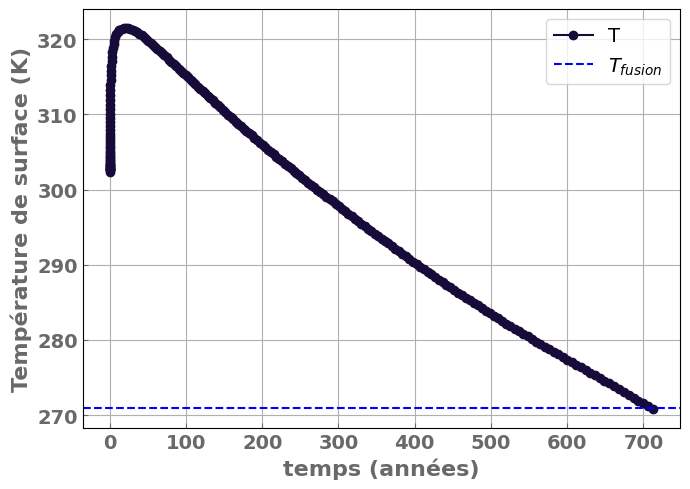

In [4]:
fig, ax = plt.subplots(1,1,figsize=(7,5),sharex=True)
n = 147
ax.plot(t_list_years , Teq_list, label='T',marker='o')
ax.set_ylabel(f'Surface temperature (K)', fontsize=16, weight='bold')

ax.set_xlabel("time (years)", fontsize=16, weight='bold')
ax.axhline(y=271,c='b',ls='--',label=r'$T_{fusion}$')
ax.legend(fontsize=14, frameon=True)
ax.tick_params(labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_weight('bold')   
# ax.plot([t_list_years[n]],[Teq_list[n]],marker='o',c='red')
fig.tight_layout()

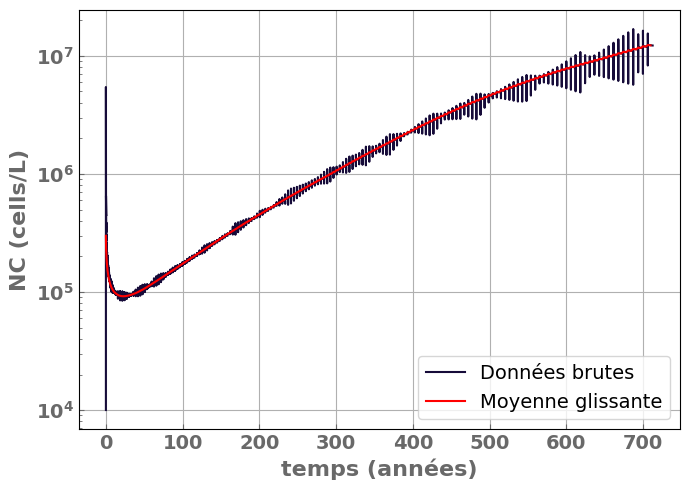

In [5]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
window_size = 10000
kernel = np.ones(window_size) / window_size
y_smooth = np.convolve(big_NC_list, kernel, mode='valid')
ax.plot(big_time_list_years, big_NC_list,label="Data")
ax.plot(big_time_list_years[:len(y_smooth)][::100] , y_smooth[::100],color='red',label="Moving average")


ax.set_ylabel(f'NC (cells/L)', fontsize=16, weight='bold')
ax.set_xlabel("time (years)", fontsize=16, weight='bold')
ax.set_yscale('log')
ax.tick_params(labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_weight('bold')
ax.legend(fontsize=14, frameon=True,loc='lower right')
# for text in ax.get_legend().get_texts():
#     text.set_weight('bold')

fig.tight_layout()

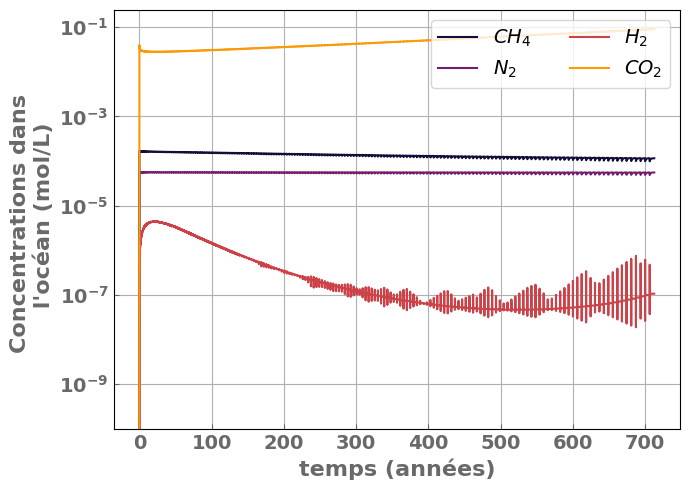

In [6]:
from Constants import *

fig, ax = plt.subplots(1, 1,figsize=(7,5),sharex=True)

ax.plot(big_time_list_years[::step] , np.array(big_ch4_wat_list)[::step]/(550*1e3*Mars_surface), label=r'${CH_4}$')
ax.plot(big_time_list_years[::step] , np.array(big_n2_wat_list)[::step]/(550*1e3*Mars_surface), label=r'${N_2}$')
ax.plot(big_time_list_years[::step] , np.array(big_h2_wat_list)[::step]/(550*1e3*Mars_surface), label=r'${H_2}$')
ax.plot(big_time_list_years[::step] , np.array(big_co2_wat_list)[::step]/(550*1e3*Mars_surface), label=r'${CO_2}$')
ax.legend(fontsize=14, frameon=True,ncol=2,loc="upper right")
for text in ax.get_legend().get_texts():
    text.set_weight('bold')
ax.set_ylabel(f"Concentrations in \n the ocean (mol/L)", fontsize=16, weight='bold')
ax.set_xlabel("time (years)", fontsize=16, weight='bold')
ax.set_yscale('log')
ax.tick_params(labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_weight('bold')
    fig.tight_layout()

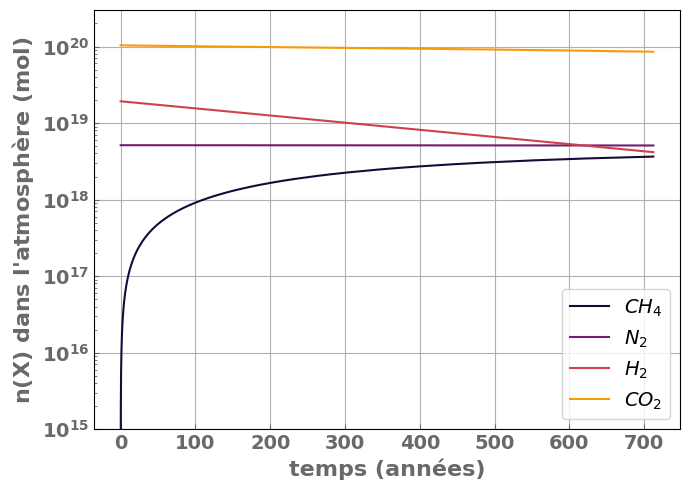

In [7]:
fig,ax = plt.subplots(1,1,figsize=(7,5))

ax.plot(big_time_list_years[::step] , big_ch4_atm_list[::step], label=r'${CH_4}$')
ax.plot(big_time_list_years[::step], big_n2_atm_list[::step], label=r'${N_2}$')
ax.plot(big_time_list_years[::step] , big_h2_atm_list[::step], label=r'${H_2}$')
ax.plot(big_time_list_years[::step] , big_co2_atm_list[::step], label=r'${CO_2}$')
ax.legend(fontsize=14, frameon=True,loc='lower right')
for text in ax.get_legend().get_texts():
    text.set_weight('bold')
ax.set_ylabel(f"$\mathbf{{n(X)}}$ in the atmosphere (mol) ", fontsize=16, weight='bold')
ax.set_xlabel("time (years)", fontsize=16, weight='bold')
ax.set_yscale('log')
ax.set_ylim(1e15,3e20)
ax.tick_params(labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_weight('bold')

fig.tight_layout()

C:\Users\fxmey\AppData\Local\Temp\ipykernel_21888\582231006.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
C:\Users\fxmey\AppData\Local\Temp\ipykernel_21888\582231006.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(suff+"_1D_atmo_fX.png",dpi=300,bbox_inches='tight')


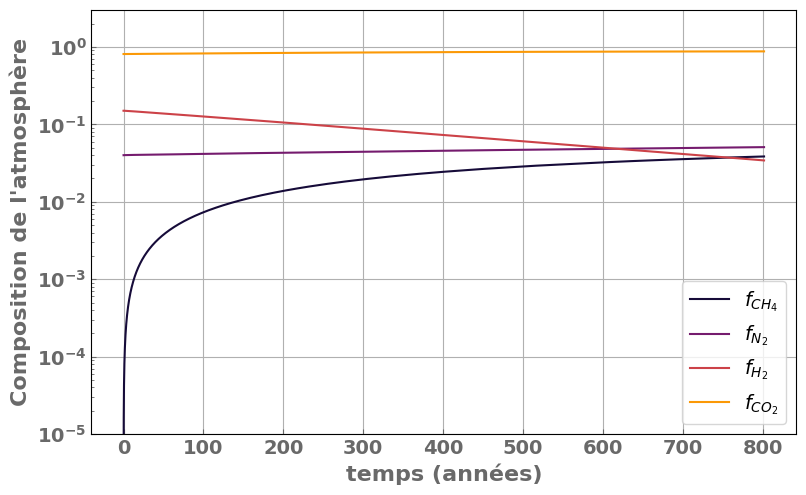

In [11]:
fig, ax = plt.subplots(1, 1)

ax.plot(big_time_list_years[::step] , big_ch4_atm_list[::step]/big_ntotatm[::step], label=r'$f_{CH_4}$')
ax.plot(big_time_list_years[::step], big_n2_atm_list[::step]/big_ntotatm[::step], label=r'$f_{N_2}$')
ax.plot(big_time_list_years[::step] , big_h2_atm_list[::step]/big_ntotatm[::step], label=r'$f_{H_2}$')
ax.plot(big_time_list_years[::step] , big_co2_atm_list[::step]/big_ntotatm[::step], label=r'$f_{CO_2}$')

ax.legend(fontsize=14, frameon=True)
for text in ax.get_legend().get_texts():
    text.set_weight('bold')
ax.set_ylabel(f"Atmospheric ratios", fontsize=16, weight='bold')
ax.set_xlabel("time (years)", fontsize=16, weight='bold')
ax.set_yscale('log')

ax.set_ylim(1e-5,3)

fig.set_figheight(5)
fig.set_figwidth(8)
fig.tight_layout()
ax.tick_params(labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_weight('bold')
plt.savefig(suff+"_1D_atmo_fX.png",dpi=300,bbox_inches='tight')

C:\Users\fxmey\AppData\Local\Temp\ipykernel_21888\3612914911.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=14, frameon=True)


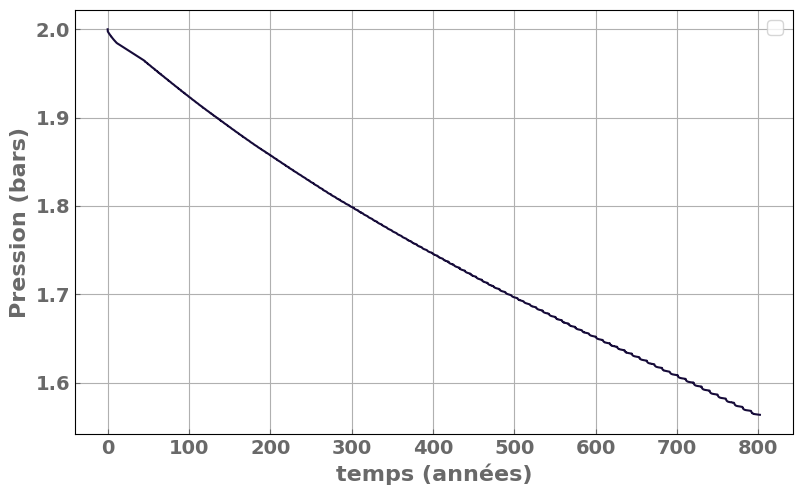

In [12]:
fig, ax = plt.subplots(1, 1)

ax.plot(big_timep_list_years[::step] , big_pressure_list[::step]/1e5)

ax.legend(fontsize=14, frameon=True)
for text in ax.get_legend().get_texts():
    text.set_weight('bold')
ax.set_ylabel(f'Pressure (bars)', fontsize=16, weight='bold')
ax.set_xlabel("time (years)", fontsize=16, weight='bold')


fig.set_figheight(5)
fig.set_figwidth(8)
fig.tight_layout()
ax.tick_params(labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_weight('bold')
plt.savefig(suff+"_1D_surface_pressure.png",dpi=300,bbox_inches='tight')

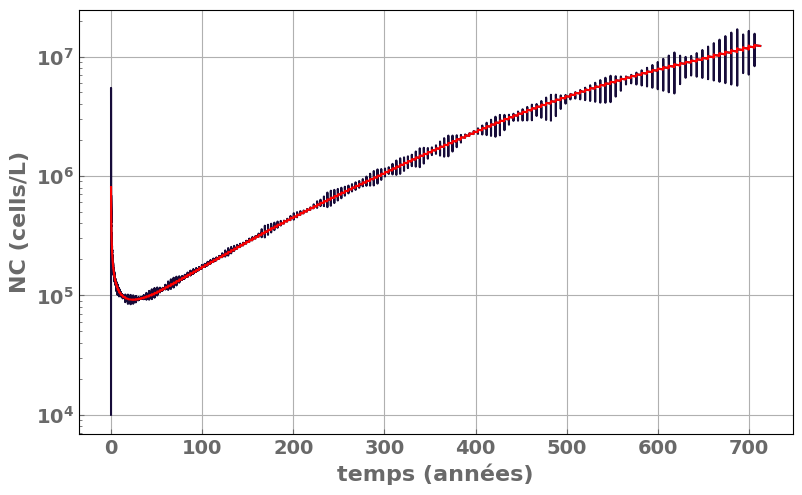

In [10]:
fig, ax = plt.subplots(1, 1)

window_size = 1000
kernel = np.ones(window_size) / window_size
y_smooth = np.convolve(big_NC_list, kernel, mode='valid')

ax.plot(big_time_list_years, big_NC_list)
ax.plot(big_time_list_years[:len(y_smooth)][::100] , y_smooth[::100],color='red')

# ax.legend(fontsize=14, frameon=True)
# for text in ax.get_legend().get_texts():
#     text.set_weight('bold')
ax.set_ylabel(f'NC (cells/L)', fontsize=16, weight='bold')
ax.set_xlabel("time (years)", fontsize=16, weight='bold')
ax.set_yscale('log')


fig.set_figheight(5)
fig.set_figwidth(8)
fig.tight_layout()
ax.tick_params(labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_weight('bold')
plt.savefig(suff+"_1D_cells_number.png",dpi=300,bbox_inches='tight')